### Ellip

/tmp/ipykernel_7108/3362383903.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)))


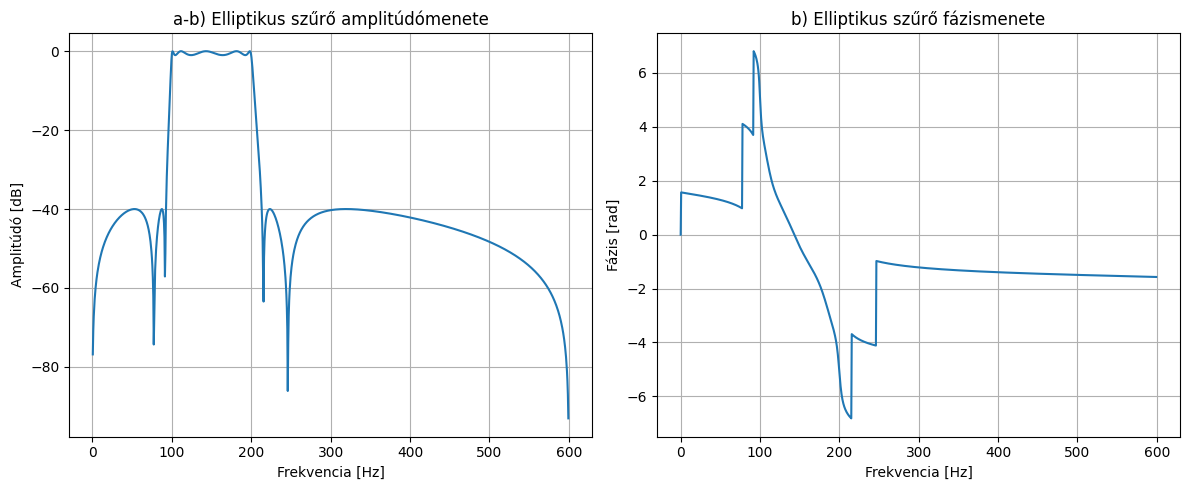

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellipord, ellip, freqz, sosfilt
from scipy.fft import fft, fftfreq
from scipy.signal import sosfreqz 

# a) Paraméterek
fs = 1200  # Hz
f1, f2 = 100, 200  # átviteli sáv
delta_p = 1        # dB (átviteli hullámzás)
delta_s = 40       # dB (zárlási sáv csillapítás - abszolút érték kell)


# 1. Aluláteresztő szűrő (Low-pass)
def ellip_lp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 + 0.1 * f0) / (fs / 2)  # kicsit kintebb stop sáv
    N, Wn = ellipord(wp, ws, delta_p, delta_s)
    sos = ellip(N, delta_p, delta_s, Wn, btype='lowpass', output='sos')
    return sos

# 2. Felüláteresztő szűrő (High-pass)
def ellip_hp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 - 0.1 * f0) / (fs / 2)  # kicsit beljebb stop sáv
    N, Wn = ellipord(wp, ws, delta_p, delta_s)
    sos = ellip(N, delta_p, delta_s, Wn, btype='highpass', output='sos')
    return sos

# 3. Sáváteresztő szűrő (Band-pass)
def ellip_bp(fs, f1, f2, delta_p, delta_s):
    wp = [f1 / (fs / 2), f2 / (fs / 2)]
    ws = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    N, Wn = ellipord(wp, ws, delta_p, delta_s)
    sos = ellip(N, delta_p, delta_s, Wn, btype='bandpass', output='sos')
    return sos

# 4. Sávtartó szűrő (Band-stop)
def ellip_bs(fs, f1, f2, delta_p, delta_s):
    wp = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    ws = [f1 / (fs / 2), f2 / (fs / 2)]
    N, Wn = ellipord(wp, ws, delta_p, delta_s)
    sos = ellip(N, delta_p, delta_s, Wn, btype='bandstop', output='sos')
    return sos

sos = ellip_bp(fs=fs, f1=f1, f2=f2, delta_p=delta_p, delta_s=delta_s)
# sos = ellip_lp(fs, 200, delta_p, delta_s)
# sos = ellip_hp(fs, 400, delta_p, delta_s)
#sos = ellip_bs(fs, 250, 350, delta_p, delta_s)


# b) Frekvencia-válasz: amplitúdó + fázis
w, h = sosfreqz(sos, worN=1024, fs=fs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("a-b) Elliptikus szűrő amplitúdómenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Amplitúdó [dB]")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title("b) Elliptikus szűrő fázismenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Fázis [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()


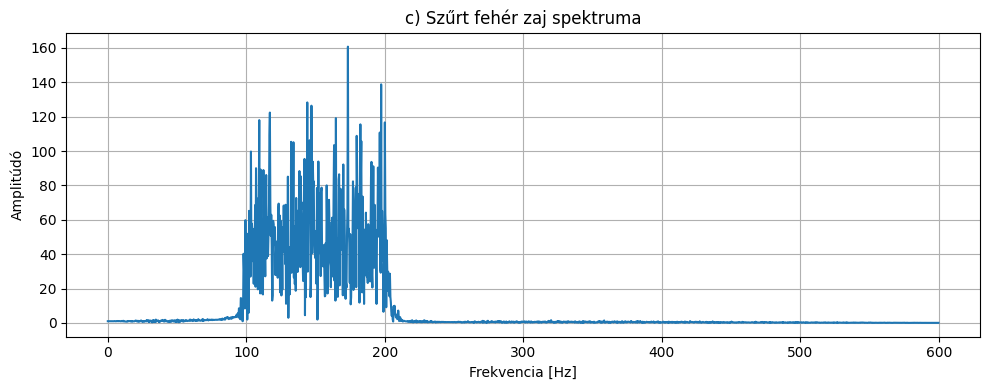

In [14]:
# c) Fehér zaj generálása
np.random.seed(0)
duration = 3  # másodperc
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
noise = np.random.normal(0, 1, size=len(t))

# Szűrés
filtered_noise = sosfilt(sos, noise)

# Spektrumvizsgálat
N = len(filtered_noise)
f = fftfreq(N, d=1/fs)[:N//2]
spectrum = np.abs(fft(filtered_noise))[:N//2]

plt.figure(figsize=(10, 4))
plt.plot(f, spectrum)
plt.title("c) Szűrt fehér zaj spektruma")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Amplitúdó")
plt.grid(True)
plt.tight_layout()
plt.show()


### Butterworth

/tmp/ipykernel_7108/3164611012.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)))


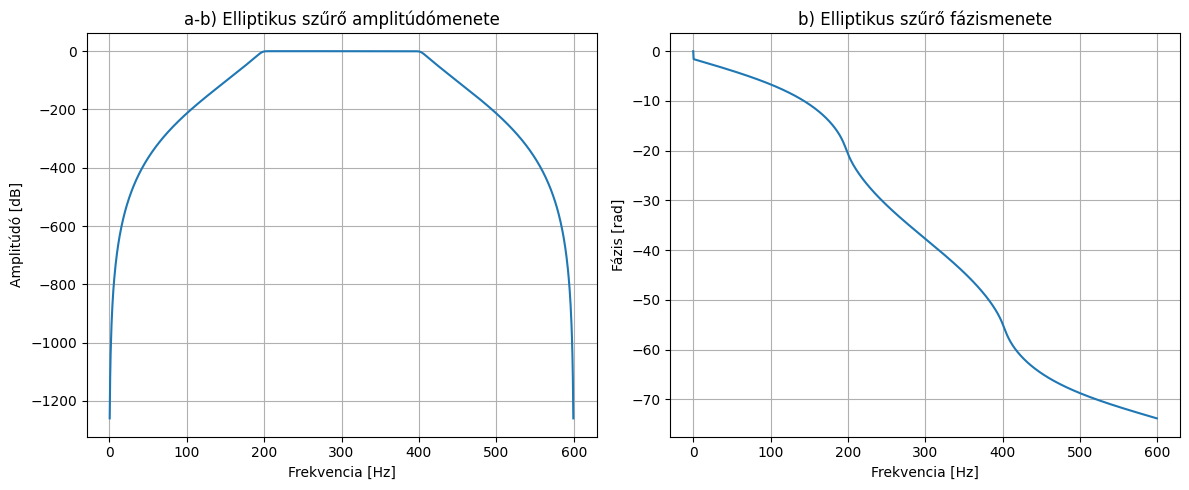

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import buttord, butter
from scipy.fft import fft, fftfreq
from scipy.signal import sosfreqz 

# a) Paraméterek
fs = 1200  # Hz
f1, f2 = 100, 200  # átviteli sáv
delta_p = 1        # dB (átviteli hullámzás)
delta_s = 40       # dB (zárlási sáv csillapítás - abszolút érték kell)


# 1. Aluláteresztő szűrő (Low-pass)
def butter_lp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 + 0.1 * f0) / (fs / 2)
    N, Wn = buttord(wp, ws, delta_p, delta_s)
    sos = butter(N, Wn, btype='lowpass', output='sos')
    return sos

# 2. Felüláteresztő szűrő (High-pass)
def butter_hp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 - 0.1 * f0) / (fs / 2)
    N, Wn = buttord(wp, ws, delta_p, delta_s)
    sos = butter(N, Wn, btype='highpass', output='sos')
    return sos

# 3. Sáváteresztő szűrő (Band-pass)
def butter_bp(fs, f1, f2, delta_p, delta_s):
    wp = [f1 / (fs / 2), f2 / (fs / 2)]
    ws = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    N, Wn = buttord(wp, ws, delta_p, delta_s)
    sos = butter(N, Wn, btype='bandpass', output='sos')
    return sos

# 4. Sávtartó szűrő (Band-stop)
def butter_bs(fs, f1, f2, delta_p, delta_s):
    wp = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    ws = [f1 / (fs / 2), f2 / (fs / 2)]
    N, Wn = buttord(wp, ws, delta_p, delta_s)
    sos = butter(N, Wn, btype='bandstop', output='sos')
    return sos

sos_lp = butter_lp(fs, f0=200, delta_p=delta_p, delta_s=delta_s)
sos_hp = butter_hp(fs, f0=400, delta_p=delta_p, delta_s=delta_s)
sos_bp = butter_bp(fs, f1=200, f2=400, delta_p=delta_p, delta_s=delta_s)
sos_bs = butter_bs(fs, f1=250, f2=350, delta_p=delta_p, delta_s=delta_s)

sos = sos_bp

# b) Frekvencia-válasz: amplitúdó + fázis
w, h = sosfreqz(sos, worN=1024, fs=fs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("a-b) Butterworth szűrő amplitúdómenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Amplitúdó [dB]")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title("b) Butterworth szűrő fázismenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Fázis [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()


### Cheby 1

/tmp/ipykernel_7108/1929762880.py:58: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)))


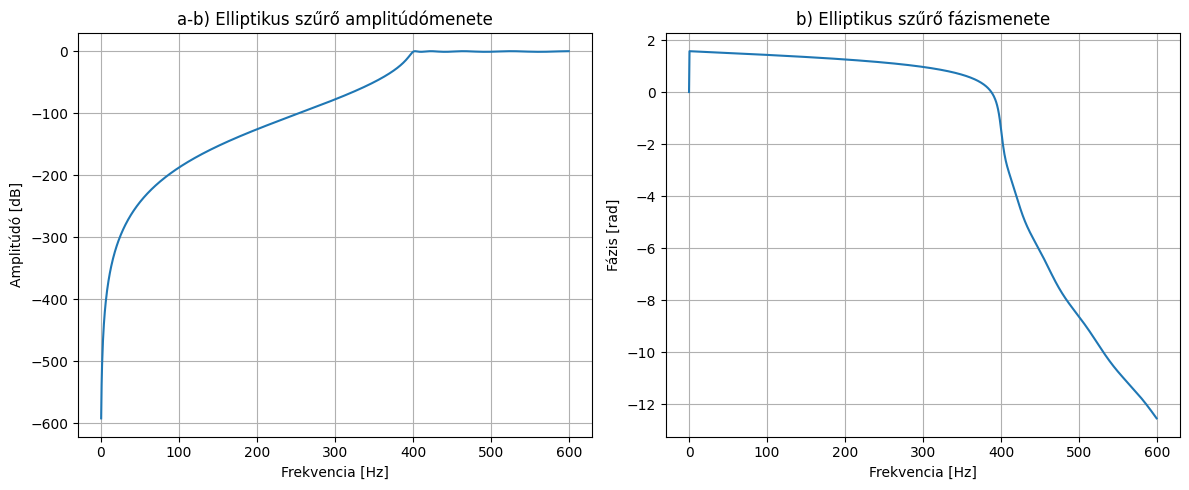

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheb1ord, cheby1
from scipy.fft import fft, fftfreq
from scipy.signal import sosfreqz 

# a) Paraméterek
fs = 1200  # Hz
f1, f2 = 100, 200  # átviteli sáv
delta_p = 1        # dB (átviteli hullámzás)
delta_s = 40       # dB (zárlási sáv csillapítás - abszolút érték kell)

# 1. Aluláteresztő szűrő (Low-pass)
def cheby1_lp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 + 0.1 * f0) / (fs / 2)
    N, Wn = cheb1ord(wp, ws, delta_p, delta_s)
    sos = cheby1(N, delta_p, Wn, btype='lowpass', output='sos')
    return sos

# 2. Felüláteresztő szűrő (High-pass)
def cheby1_hp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 - 0.1 * f0) / (fs / 2)
    N, Wn = cheb1ord(wp, ws, delta_p, delta_s)
    sos = cheby1(N, delta_p, Wn, btype='highpass', output='sos')
    return sos

# 3. Sáváteresztő szűrő (Band-pass)
def cheby1_bp(fs, f1, f2, delta_p, delta_s):
    wp = [f1 / (fs / 2), f2 / (fs / 2)]
    ws = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    N, Wn = cheb1ord(wp, ws, delta_p, delta_s)
    sos = cheby1(N, delta_p, Wn, btype='bandpass', output='sos')
    return sos

# 4. Sávtartó szűrő (Band-stop)
def cheby1_bs(fs, f1, f2, delta_p, delta_s):
    wp = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    ws = [f1 / (fs / 2), f2 / (fs / 2)]
    N, Wn = cheb1ord(wp, ws, delta_p, delta_s)
    sos = cheby1(N, delta_p, Wn, btype='bandstop', output='sos')
    return sos

sos_lp = cheby1_lp(fs, f0=200, delta_p=delta_p, delta_s=delta_s)
sos_hp = cheby1_hp(fs, f0=400, delta_p=delta_p, delta_s=delta_s)
sos_bp = cheby1_bp(fs, f1=200, f2=400, delta_p=delta_p, delta_s=delta_s)
sos_bs = cheby1_bs(fs, f1=250, f2=350, delta_p=delta_p, delta_s=delta_s)

sos = sos_hp

# b) Frekvencia-válasz: amplitúdó + fázis
w, h = sosfreqz(sos, worN=1024, fs=fs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("a-b) Cheby1 szűrő amplitúdómenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Amplitúdó [dB]")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title("b) Cheby1 szűrő fázismenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Fázis [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()


### Cheby 2

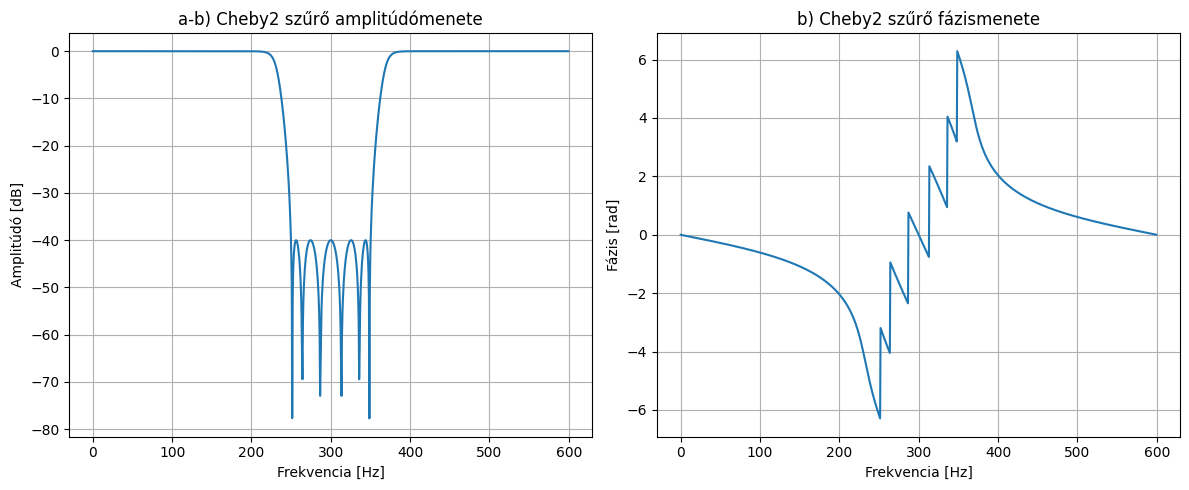

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheb2ord, cheby2
from scipy.fft import fft, fftfreq
from scipy.signal import sosfreqz 

# a) Paraméterek
fs = 1200  # Hz
f1, f2 = 100, 200  # átviteli sáv
delta_p = 1        # dB (átviteli hullámzás)
delta_s = 40       # dB (zárlási sáv csillapítás - abszolút érték kell)

# 1. Aluláteresztő szűrő (Low-pass)
def cheby2_lp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 + 0.1 * f0) / (fs / 2)
    N, Wn = cheb2ord(wp, ws, delta_p, delta_s)
    sos = cheby2(N, delta_s, Wn, btype='lowpass', output='sos')
    return sos

# 2. Felüláteresztő szűrő (High-pass)
def cheby2_hp(fs, f0, delta_p, delta_s):
    wp = f0 / (fs / 2)
    ws = (f0 - 0.1 * f0) / (fs / 2)
    N, Wn = cheb2ord(wp, ws, delta_p, delta_s)
    sos = cheby2(N, delta_s, Wn, btype='highpass', output='sos')
    return sos

# 3. Sáváteresztő szűrő (Band-pass)
def cheby2_bp(fs, f1, f2, delta_p, delta_s):
    wp = [f1 / (fs / 2), f2 / (fs / 2)]
    ws = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    N, Wn = cheb2ord(wp, ws, delta_p, delta_s)
    sos = cheby2(N, delta_s, Wn, btype='bandpass', output='sos')
    return sos

# 4. Sávtartó szűrő (Band-stop)
def cheby2_bs(fs, f1, f2, delta_p, delta_s):
    wp = [(f1 - 0.1 * f1) / (fs / 2), (f2 + 0.1 * f2) / (fs / 2)]
    ws = [f1 / (fs / 2), f2 / (fs / 2)]
    N, Wn = cheb2ord(wp, ws, delta_p, delta_s)
    sos = cheby2(N, delta_s, Wn, btype='bandstop', output='sos')
    return sos


sos_lp = cheby2_lp(fs, f0=200, delta_p=delta_p, delta_s=delta_s)
sos_hp = cheby2_hp(fs, f0=400, delta_p=delta_p, delta_s=delta_s)
sos_bp = cheby2_bp(fs, f1=200, f2=400, delta_p=delta_p, delta_s=delta_s)
sos_bs = cheby2_bs(fs, f1=250, f2=350, delta_p=delta_p, delta_s=delta_s)

sos = sos_bs

# b) Frekvencia-válasz: amplitúdó + fázis
w, h = sosfreqz(sos, worN=1024, fs=fs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title("a-b) Cheby2 szűrő amplitúdómenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Amplitúdó [dB]")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title("b) Cheby2 szűrő fázismenete")
plt.xlabel("Frekvencia [Hz]")
plt.ylabel("Fázis [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()
